In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [3]:
from   astropy.table import Table
from   cosmo import cosmo, fsky

In [4]:
field = 'G9'
realz = 0

In [64]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_{}_{}.fits'.format(field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.579023961),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763)])

In [65]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_bd_{}_{}.fits'.format(field, realz)

In [66]:
print(fpath)

/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms_bd_G9_0.fits


In [67]:
! ls -lt /global/cscratch1/sd/mjwilson/desi/BGS/Sam/

total 291204
-rw-rw---- 1 mjwilson desi 121472640 Dec 17 03:00 randoms_bd_G9_0.fits
-rw-rw---- 1 mjwilson desi  92027520 Dec 16 16:10 randoms_N8_G9_0.fits
-rw-rw---- 1 mjwilson desi  84669120 Dec 16 15:32 randoms_G9_0.fits
drwxrws--- 2 mjwilson desi      4096 Dec 16 06:09 v0
drwxrws--- 2 mjwilson desi      4096 Dec 13 13:50 safe


In [68]:
rand = Table.read(fpath)

In [63]:
rand.meta

OrderedDict()

In [54]:
len(rand) / 1.e6

1.840387

In [10]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,str2,float32,float32,float32,int64,int32,float64,int64
134.1185,-0.808964,0.16447665,662216.5,541755,G9,477.0616,-7.3086348,-10.883285,0,1090,9.774657518542892,673717
138.95676,2.6404722,0.24579756,2098134.0,1104169,G9,698.7809,48.364056,26.22122,0,970,4.346966069687991,337314
130.0458,-0.3668098,0.24854927,2165501.2,1081817,G9,705.64355,-61.12442,-10.666243,0,1065,11.795548078978328,424942
133.66829,0.29416147,0.23967364,1952958.9,827053,G9,684.2005,-15.8584385,-2.4309745,0,1102,26.83388185444483,1111677
135.87224,-1.7450509,0.28237346,3105515.2,1542999,G9,798.11597,12.209394,-31.261341,0,847,2.9014505174250056,1422889
133.17665,2.6008437,0.17796256,831746.6,575370,G9,514.3087,-16.33149,18.897867,0,906,3.227366432430104,1362459
135.21371,1.9626317,0.2526735,2268975.8,1759399,G9,719.2336,2.7313383,18.392054,0,1070,12.592323623895311,221050
138.70532,0.047041986,0.29556105,3530214.8,161017,G9,831.9195,53.93429,-6.5437675,0,1095,9.00704178614997,1244039
135.60945,2.12468,0.23722042,1896622.0,1646351,G9,677.43146,7.2503963,19.241734,0,1076,10.051226966645427,1821948


(-3.0, 4.0)

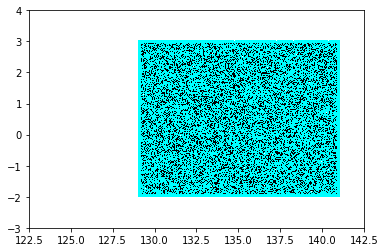

In [11]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

pl.xlim(122.5, 142.5)
pl.ylim(-3., 4.)

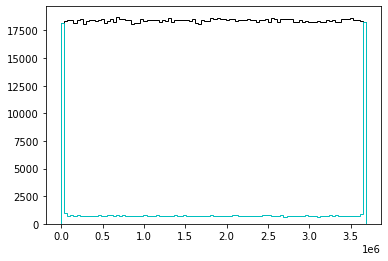

In [12]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

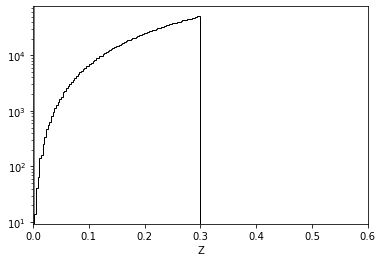

In [13]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

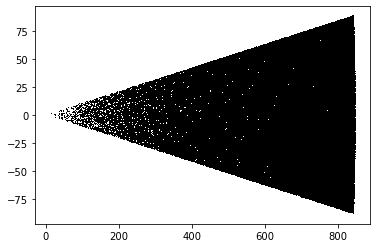

In [14]:
pl.plot(rand['CARTESIAN_X'][::10], rand['CARTESIAN_Y'][::10], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

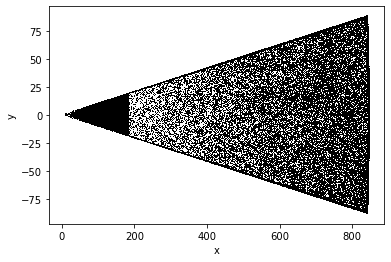

In [15]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1000.0)

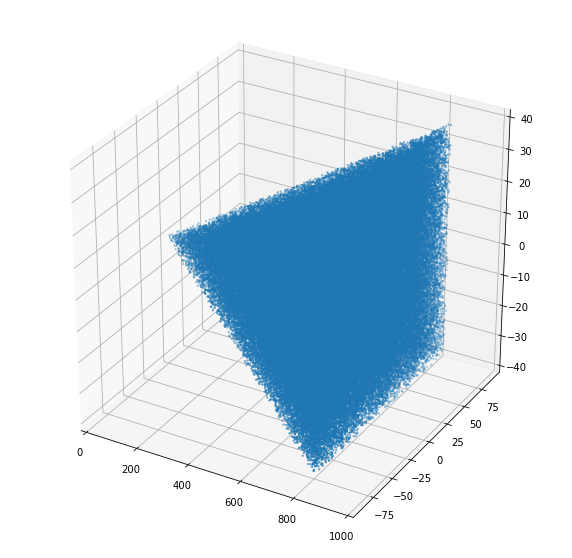

In [16]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][::10],\
           rand['CARTESIAN_Y'][::10],\
           rand['CARTESIAN_Z'][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

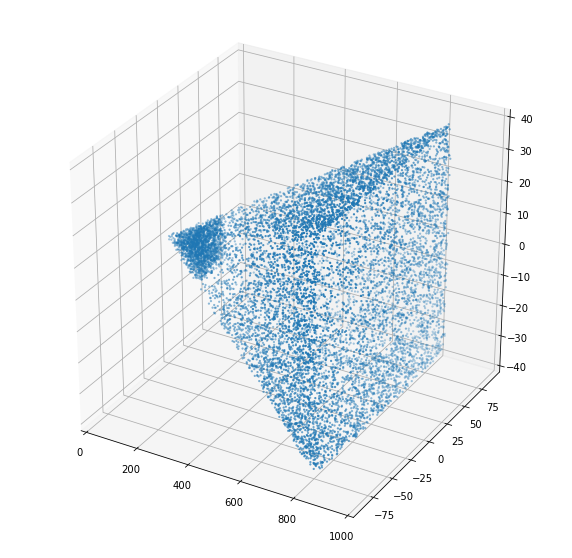

In [17]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [18]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000070637317043

In [19]:
np.mean(rand['IS_BOUNDARY'].data)

0.058758293771907756

In [20]:
rand['N8'].data.min(), rand['N8'].data.max()

(12, 1227)

In [21]:
vol  = fsky(5. * 12.) * (cosmo.comoving_volume(0.3).value - cosmo.comoving_volume(0.0).value)
vol8 = (4./3.)*np.pi*(8.**3.)

rand_density = len(rand) / vol

nrand_sphere8 = vol8 * rand_density
perror_sphere8 = np.sqrt(nrand_sphere8)

print('{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}'.format(len(rand) / 1.e6, rand_density, nrand_sphere8, perror_sphere8))

1.840	0.500	1072.331	32.746


(50.0, 1500.0)

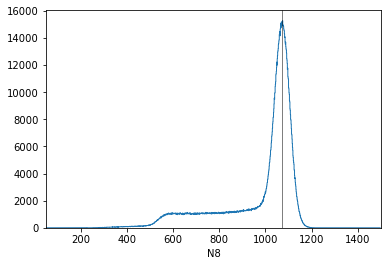

In [25]:
_ = pl.hist(rand['N8'], bins=np.arange(0, 1500, 1), histtype='step')
pl.axvline(nrand_sphere8, c='k', lw=0.5)
pl.xlabel('N8')
pl.xlim(50., 1500.)

In [26]:
100. * np.sqrt(nrand_sphere8) / nrand_sphere8

3.053765109934578

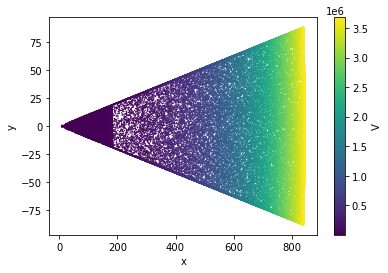

In [27]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

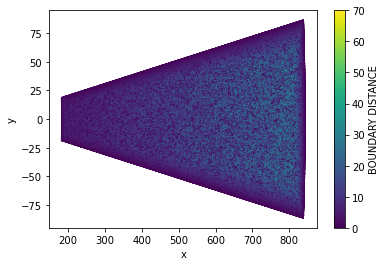

In [28]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='BOUNDARY DISTANCE')

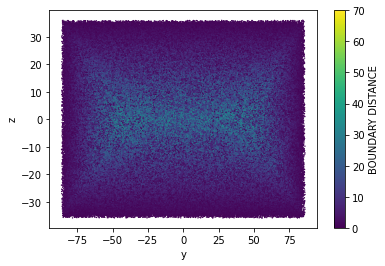

In [29]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_Y'][isin], rand['CARTESIAN_Z'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('y')
pl.ylabel('z')
pl.colorbar(label='BOUNDARY DISTANCE')

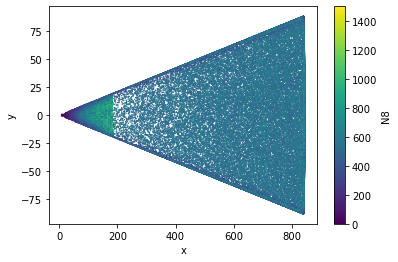

In [32]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['N8'][isin], vmin=0, vmax=1500, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

(0.2, 1.2)

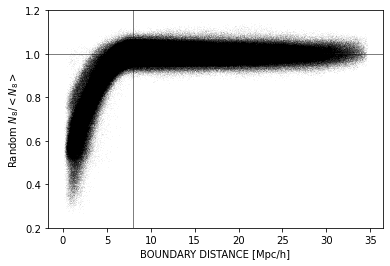

In [42]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['N8'][isin] / nrand_sphere8, marker='.', lw=0.0, s=1, alpha=0.1, c='k')

pl.xlabel('BOUNDARY DISTANCE [Mpc/h]')
pl.ylabel(r'Random $N_8 / <N_8>$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

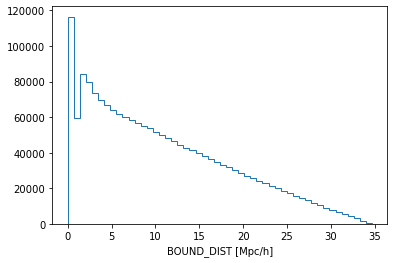

In [36]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

# Done.